In [1]:
# Import relevant packages

import uproot # conda install -c conda-forge uproot
import vector # conda install -c conda-forge vector
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import matplotlib.colors as colors
import json

In [35]:
f=uproot.open("/Users/isaac/Desktop/mucol_plotting_scripts/macros/All_Tracks/ntup_tracksBIB140.root")

In [36]:
print(f.keys())

['truth_rxy;1', 'truth_pt;1', 'truth_theta;1', 'truth_phi;1', 'track_d0;1', 'track_z0;1', 'track_pt;1', 'track_phi;1', 'track_theta;1', 'track_nholes;1', 'track_nhits;1', 'track_chi2ndf;1', 'ntrack_all;1', 'ntrack_good;1', 'track_hit_time;1']


In [54]:
print(f["track_nhits"].to_numpy()[0])

[ 0.  0.  0.  0.  0.  0. 30.  1.  0.  1.  1.  0.  0.  1.  2.  1.  1.  0.
  0.  0.]


### Without BIB

In [4]:
print(type(f["truth_rxy"]))

<class 'uproot.models.TH.Model_TH1D_v3'>


In [19]:
j=open("/Users/isaac/Desktop/mucol_plotting_scripts/macros/All_Tracks/ntup_tracks50.json")

In [20]:
data=json.load(j)

In [7]:
# a handy plotting function
def plot1DHistogram(data,bins,scale='linear',label="", savefig=False, dpi=300):
    
    # handle data, there must be a smarter way to do this...
    if type(data[0])==np.int64 : data_flat=data
    elif type(data[0])==np.int32 : data_flat=data
    elif type(data[0])==np.float32 : data_flat=data
    elif type(data[0])==np.float64 : data_flat=data
    else: data_flat = ak.flatten(data)
    
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)
    
    ax.hist(data_flat, bins=bins)
    
    # handle labels
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    plt.yscale(scale)
    if savefig:
        plt.savefig(title + ".png", dpi=dpi)
    plt.show()

In [8]:
# a handy plotting function
def plot2DHistogram(datax, datay, bins=100, norm="log", label="", savefig=False, dpi=300):
    
    data_flatx = np.array(np.ravel(datax)).T
    data_flaty = np.array(np.ravel(datay)).T
    #print(len(data_flatx),data_flatx)
    #print(len(data_flaty),data_flaty)
    
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)
    
    hh = ax.hist2d(data_flatx, data_flaty, bins=bins, norm=norm, cmap="plasma")
    
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2]  
    zlabel = "" if len(label.split(";")) < 4 else label.split(";")[3] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    
    # colorbars are annoying
    cbar = fig.colorbar(hh[3])
    #cbar.ax.tick_params(labelsize=tick_font_size)
    cbar.set_label(zlabel, fontsize=15)

    if savefig:
        plt.savefig(title + ".png", dpi=dpi)
    plt.show()

In [9]:
def findLen(akwardarray):
    print(len(akwardarray))
    for i in range(len(akwardarray)):
        print(len(akwardarray[i]))

In [10]:
print(data.keys())

dict_keys(['truth_pt', 'truth_phi', 'truth_theta', 'track_pt', 'track_phi', 'track_theta', 'track_d0', 'track_z0', 'track_d0err', 'track_z0err', 'track_chi2', 'track_ndof', 'track_nhits', 'track_hit_t', 'track_hit_x', 'track_hit_y', 'track_hit_z'])


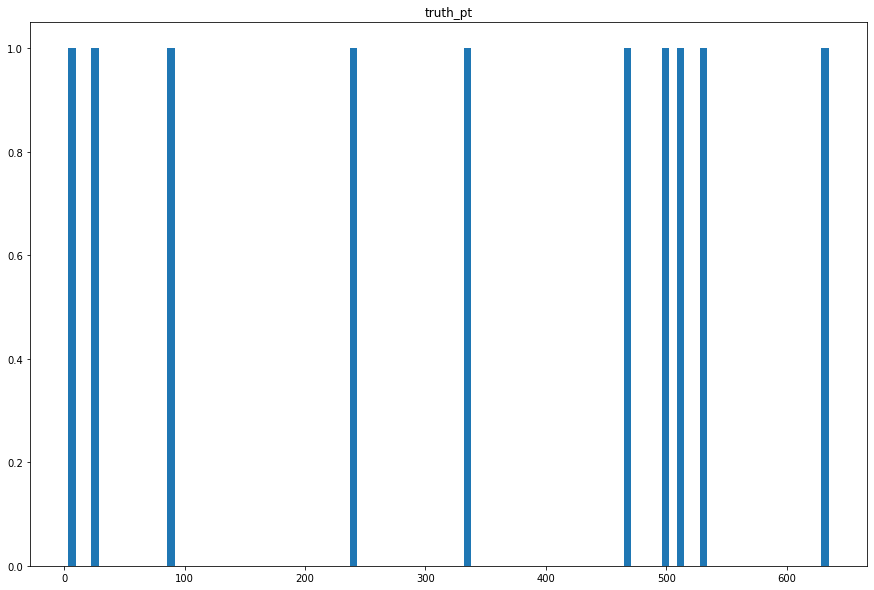

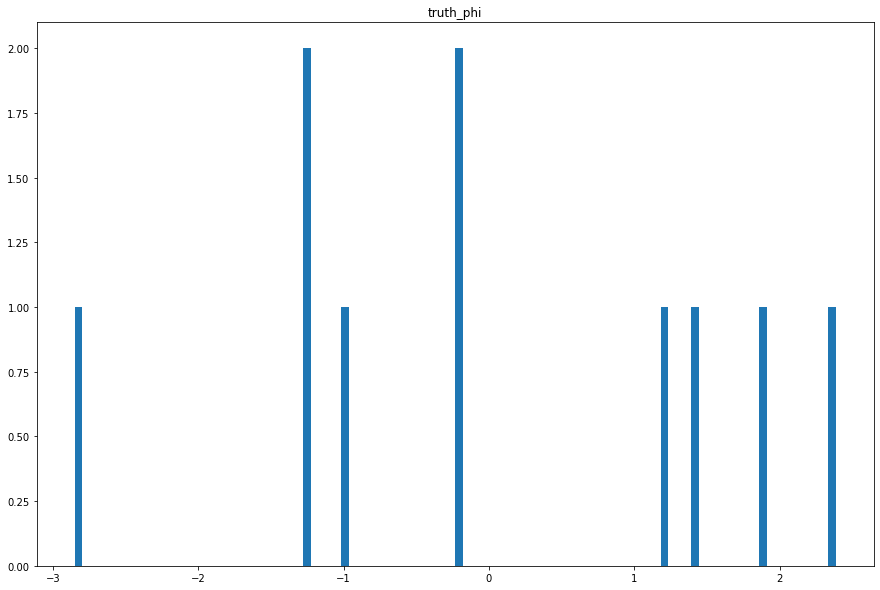

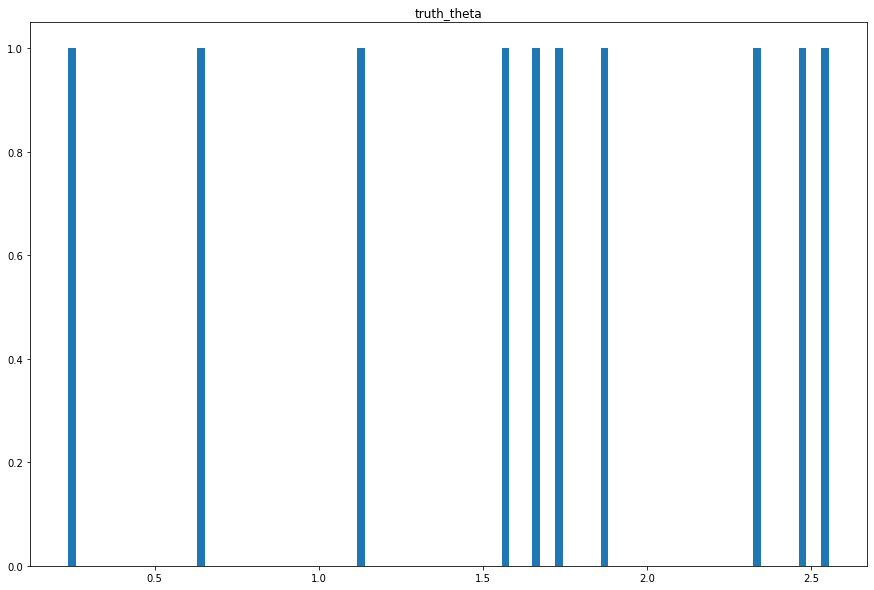

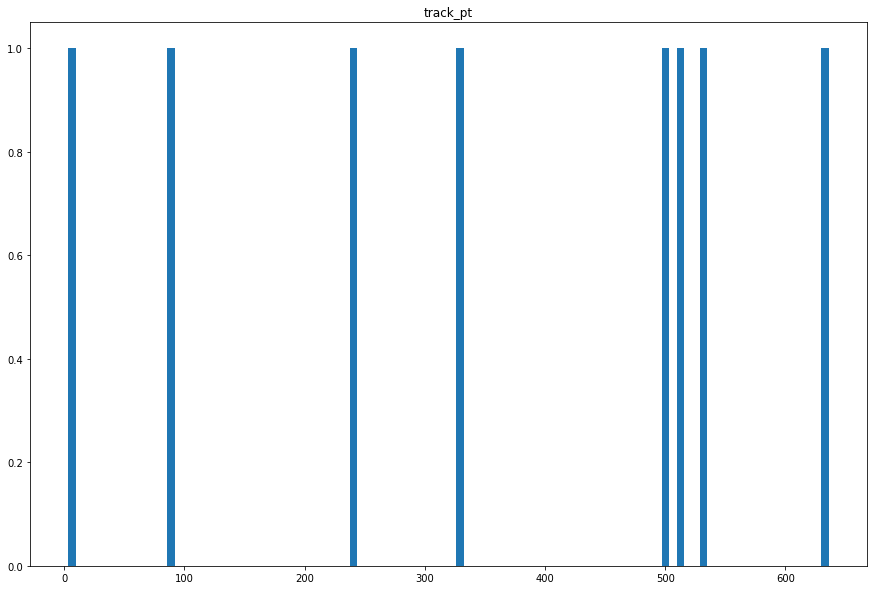

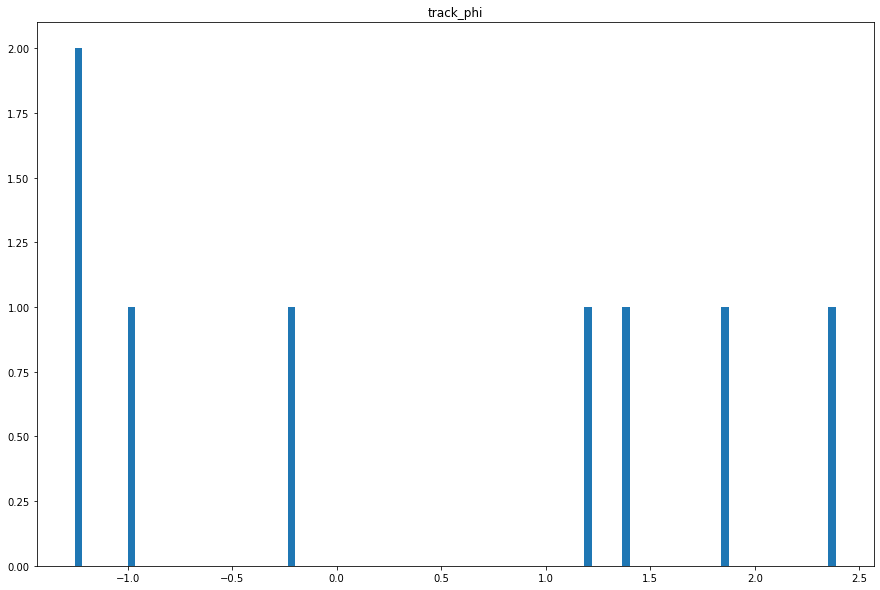

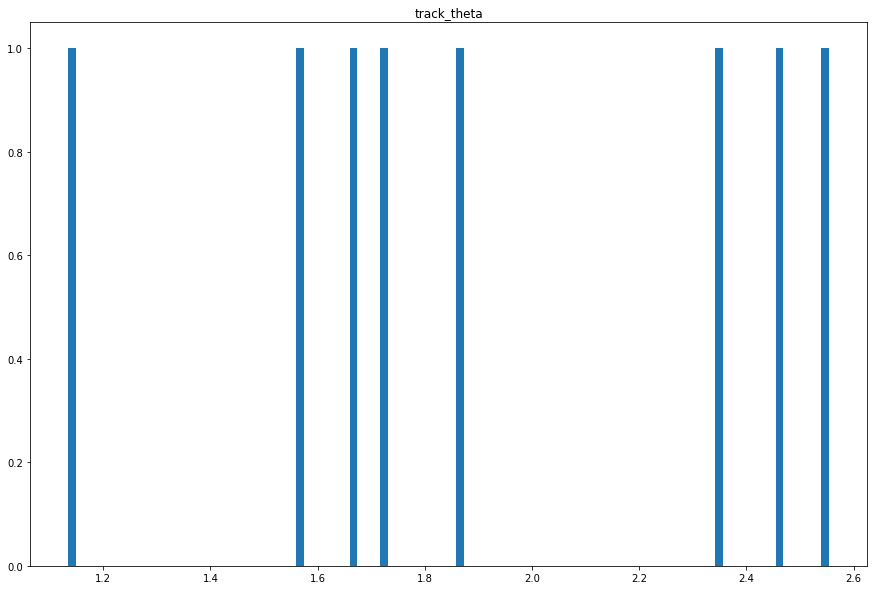

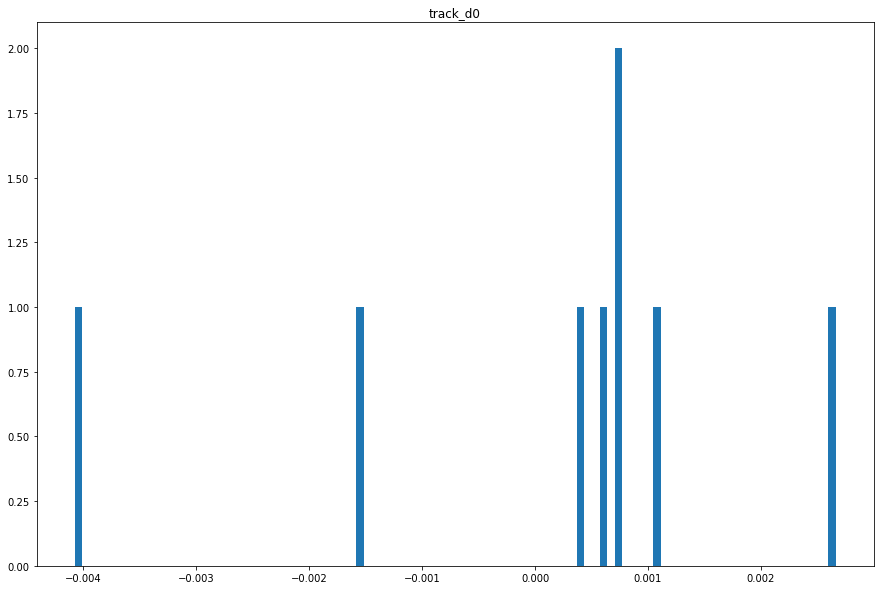

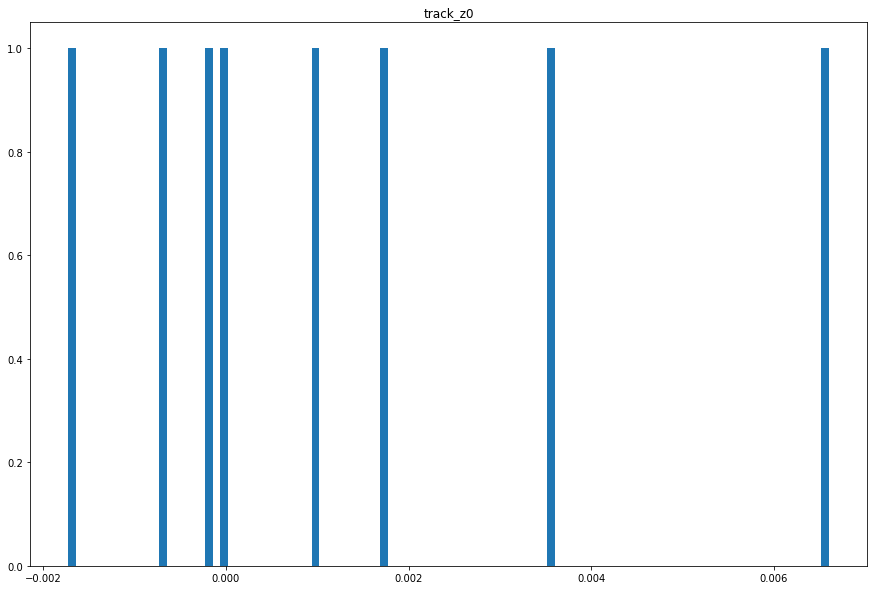

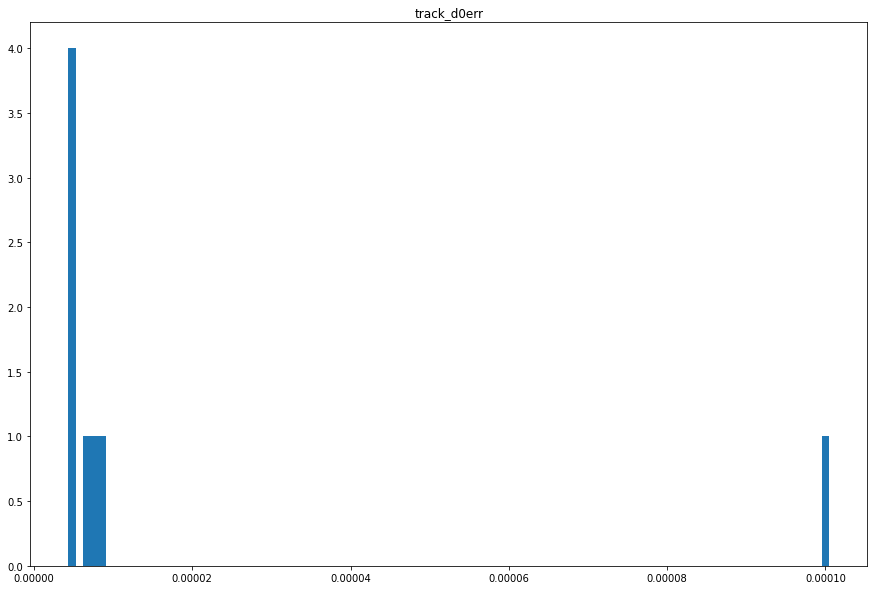

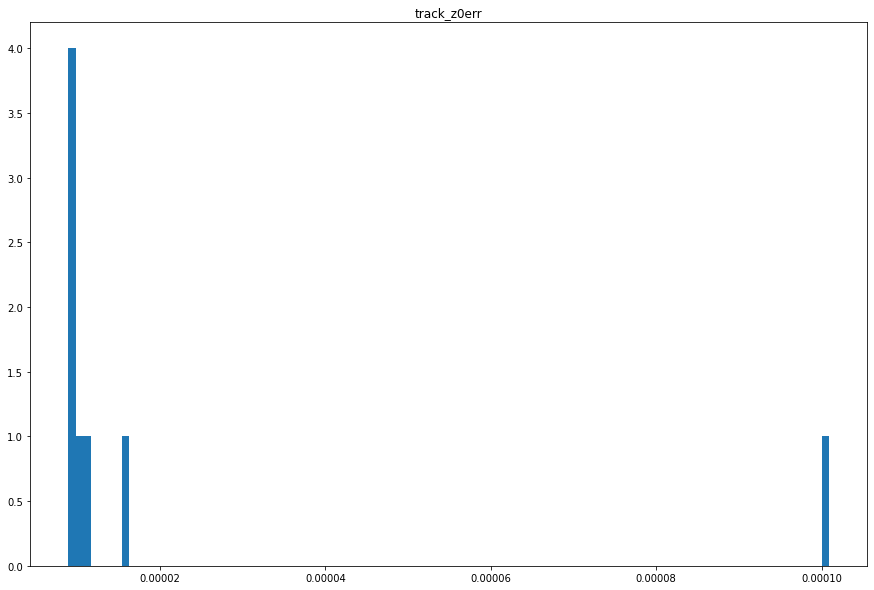

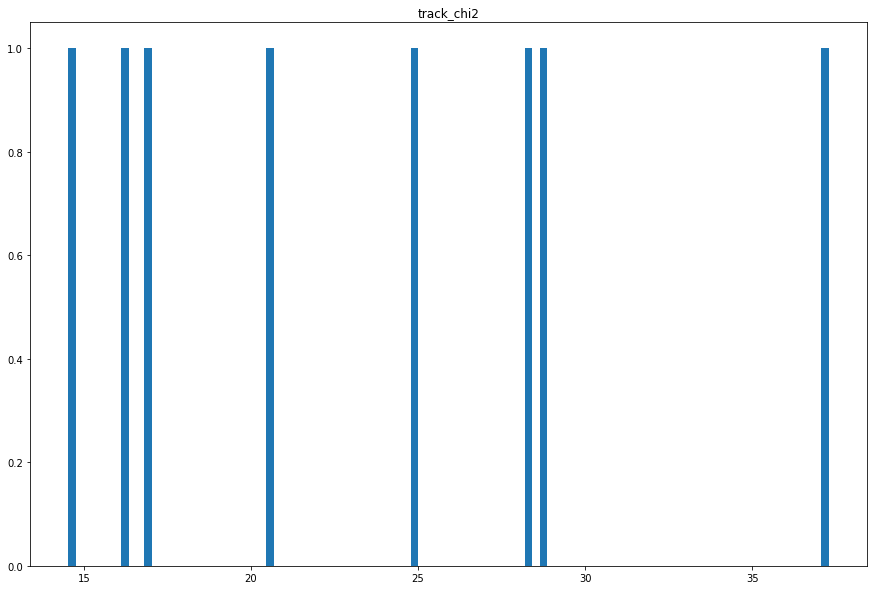

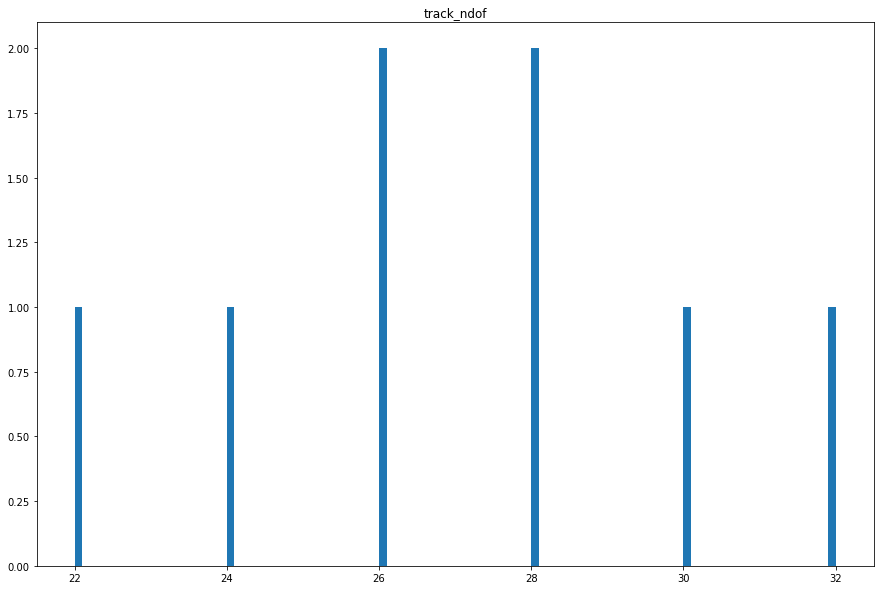

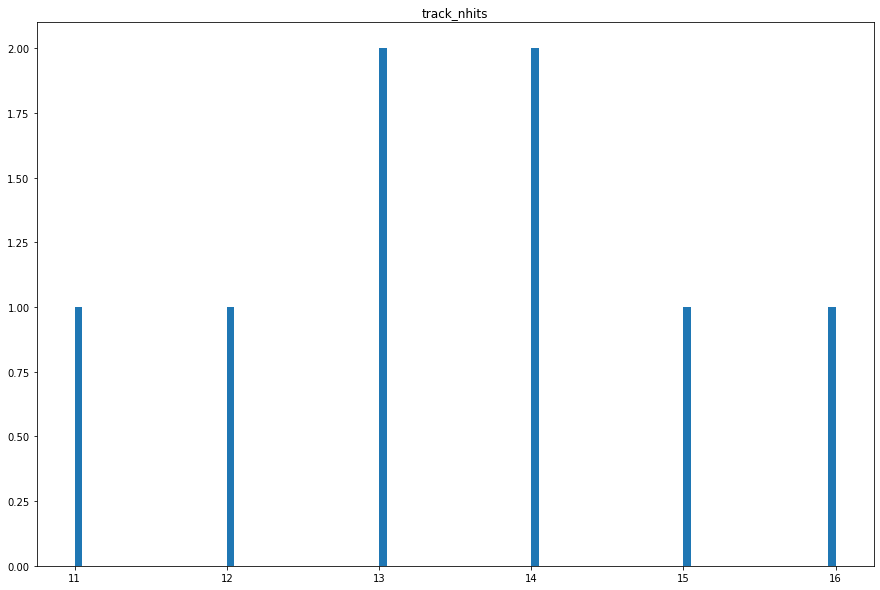

ValueError: cannot convert to RegularArray because subarray lengths are not regular (in compiled code: https://github.com/scikit-hep/awkward/blob/awkward-cpp-17/awkward-cpp/src/cpu-kernels/awkward_ListOffsetArray_toRegularArray.cpp#L22)

This error occurred while calling

    ak.to_numpy(
        <Array [[-0.00129, ..., 0.00606], ..., [...]] type='8 * var * float64'>
        allow_missing = True
    )

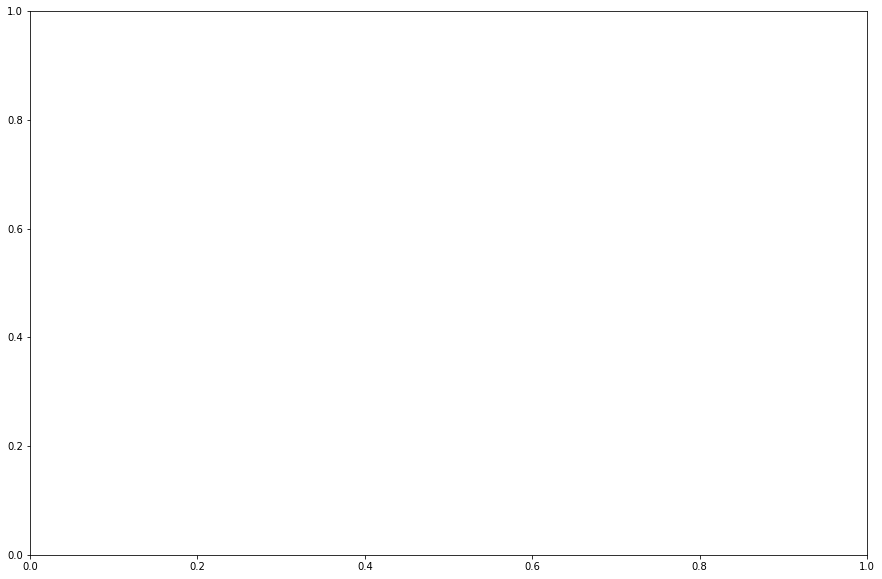

In [11]:
for i in data.keys():
    plot1DHistogram(data[i], bins=100, label=str(i))

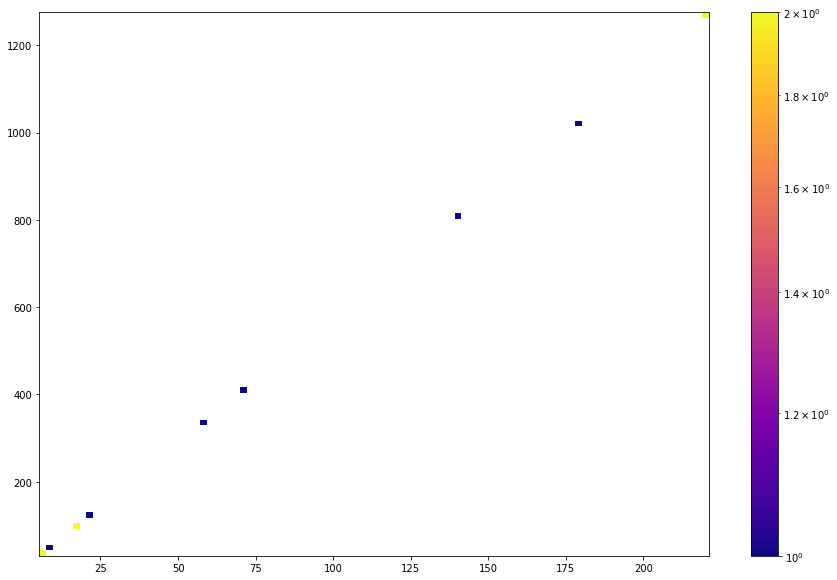

In [17]:
plot2DHistogram(data["track_hit_x"][0], data["track_hit_y"][0], bins=100)

### With BIB

In [29]:
dataBIB=json.load(open("/Users/isaac/Desktop/mucol_plotting_scripts/macros/All_Tracks/ntup_tracksBIB140.json"))

In [30]:
print(dataBIB.keys())

dict_keys(['truth_pt', 'truth_phi', 'truth_theta', 'track_pt', 'track_phi', 'track_theta', 'track_d0', 'track_z0', 'track_d0err', 'track_z0err', 'track_chi2', 'track_ndof', 'track_nhits', 'track_hit_t', 'track_hit_x', 'track_hit_y', 'track_hit_z'])


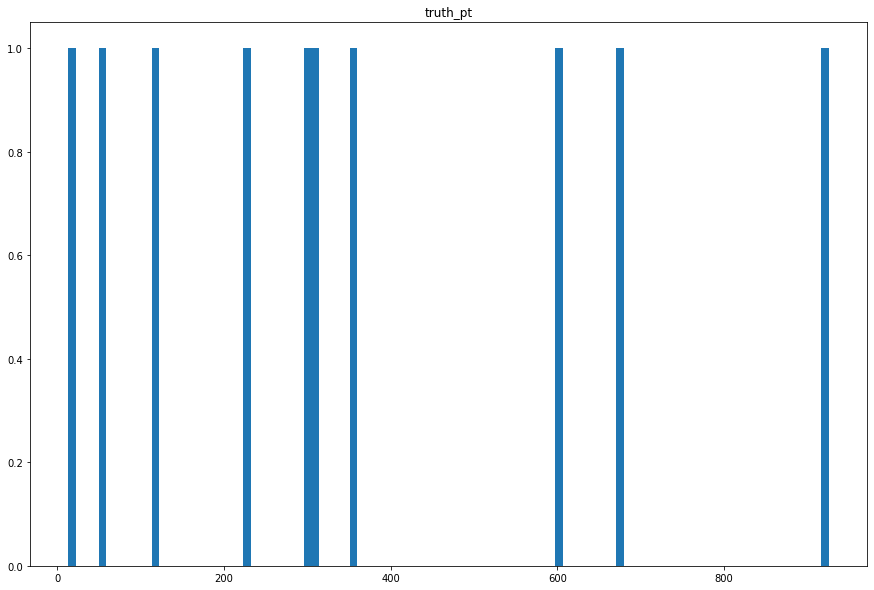

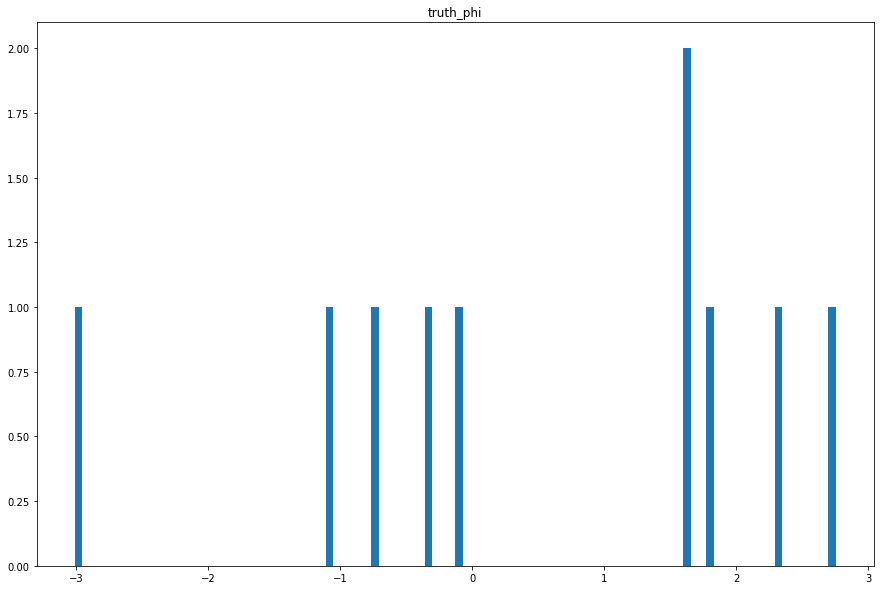

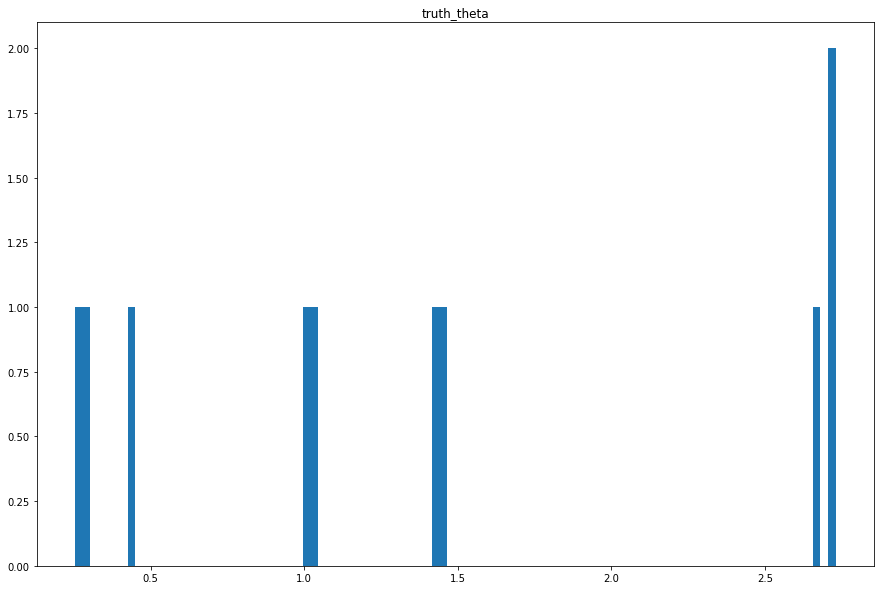

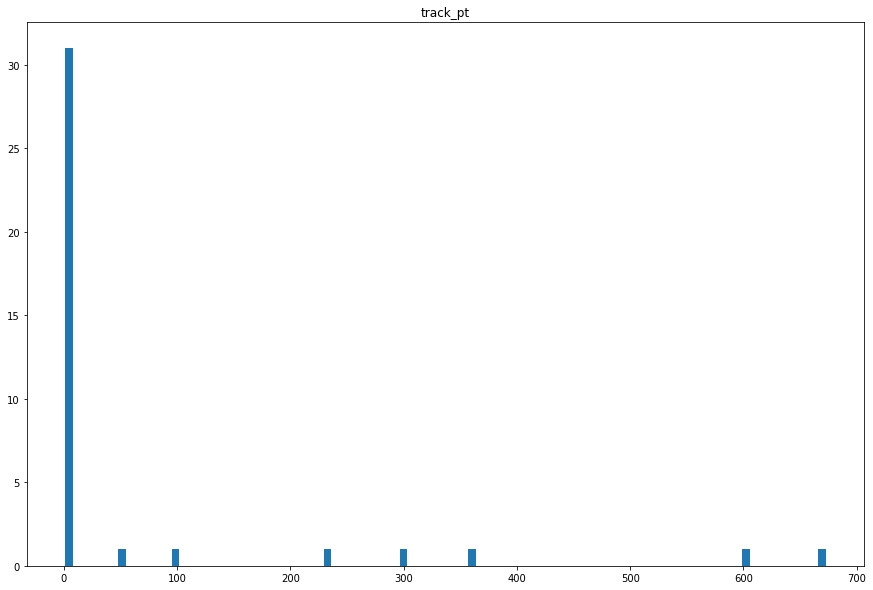

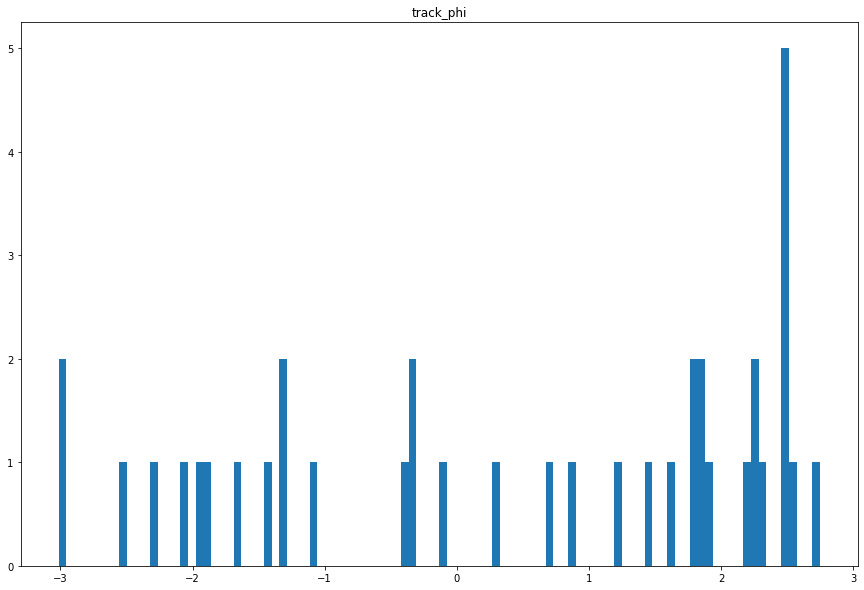

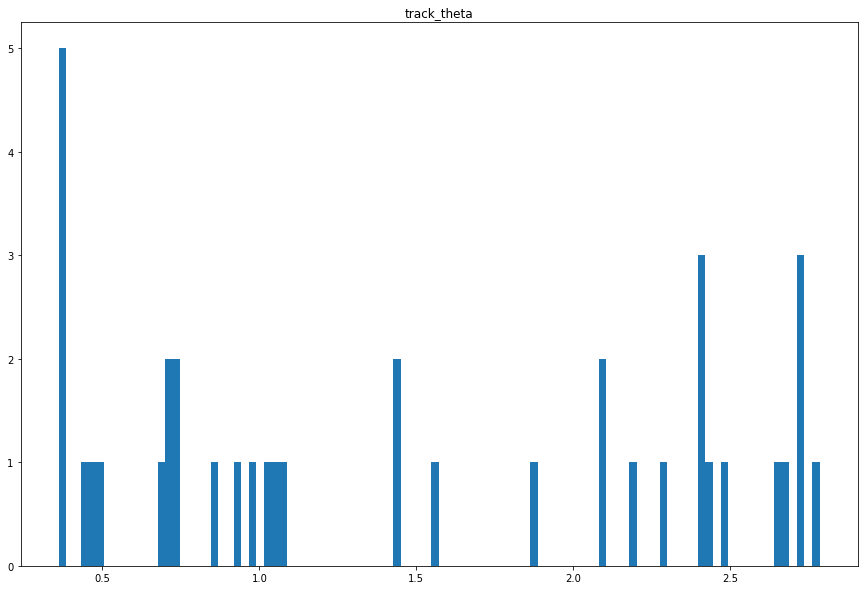

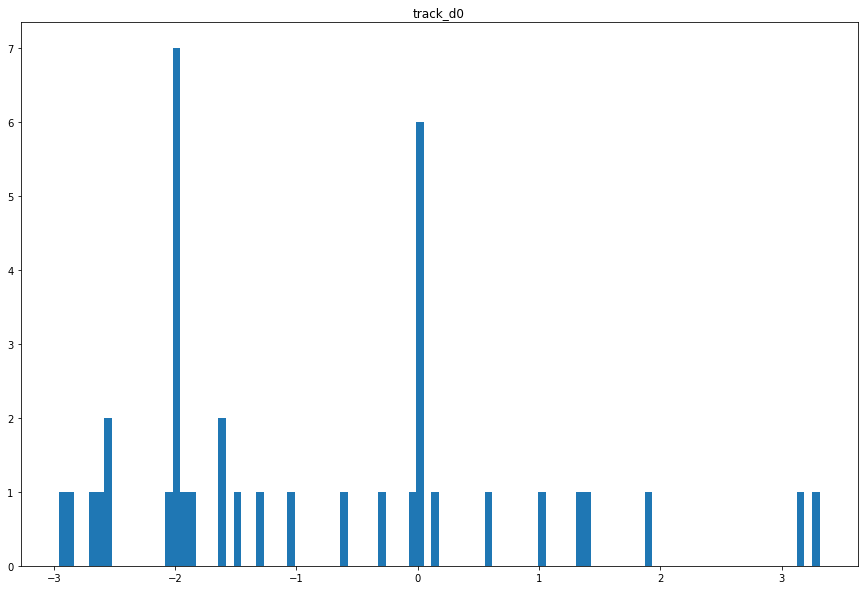

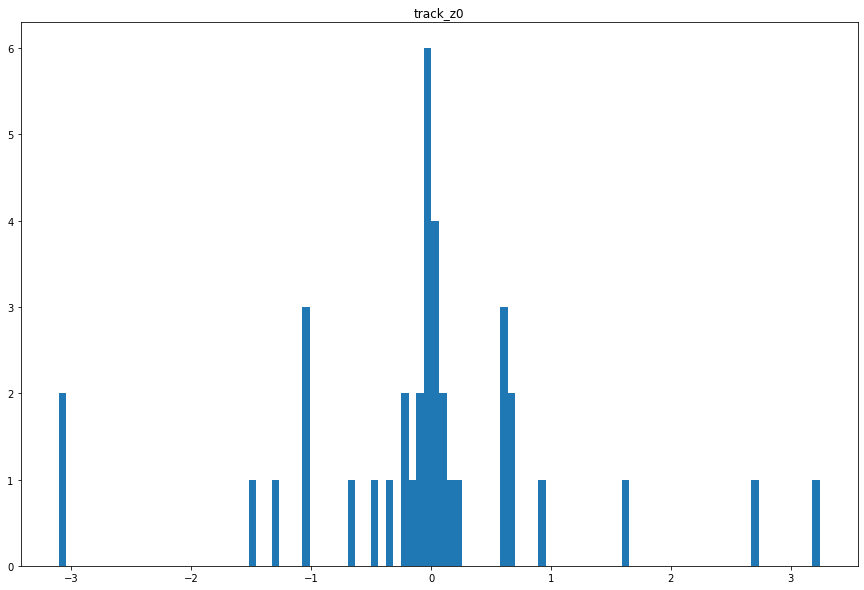

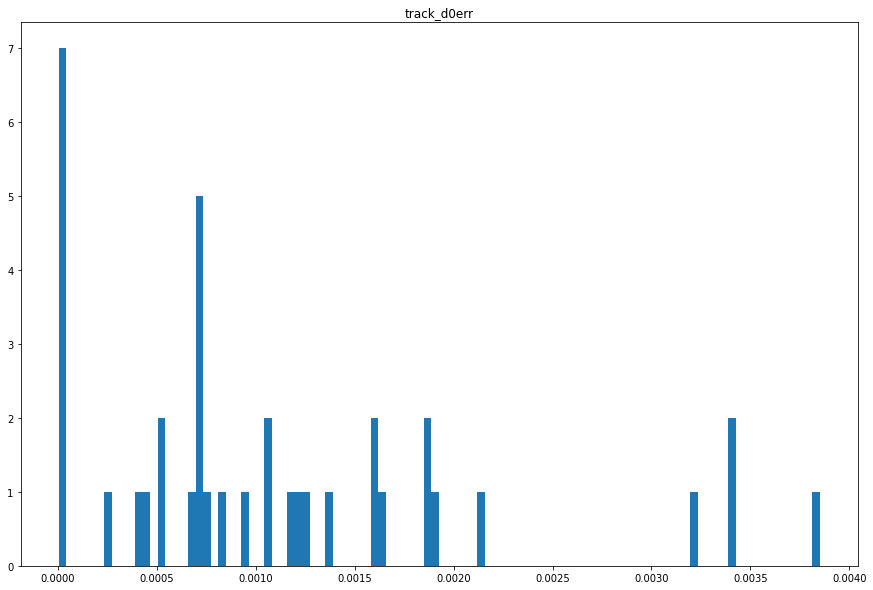

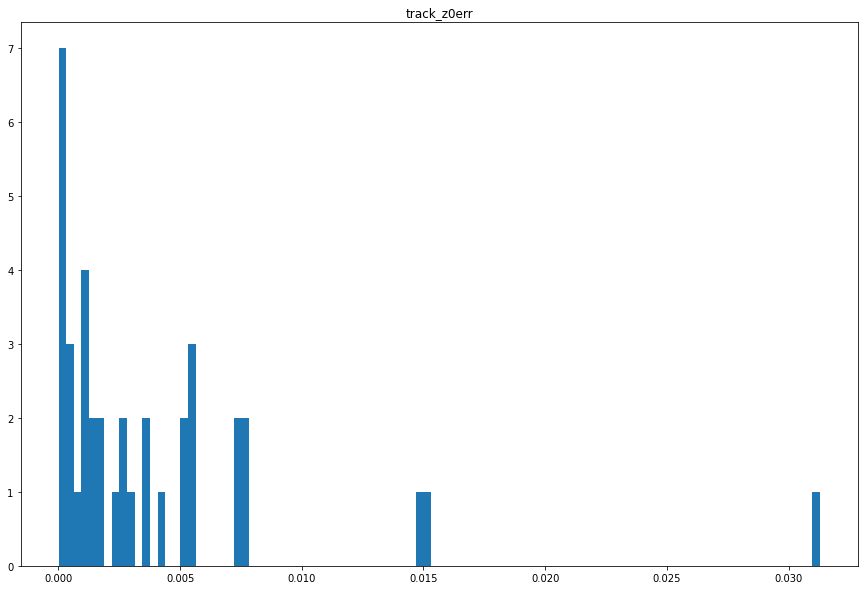

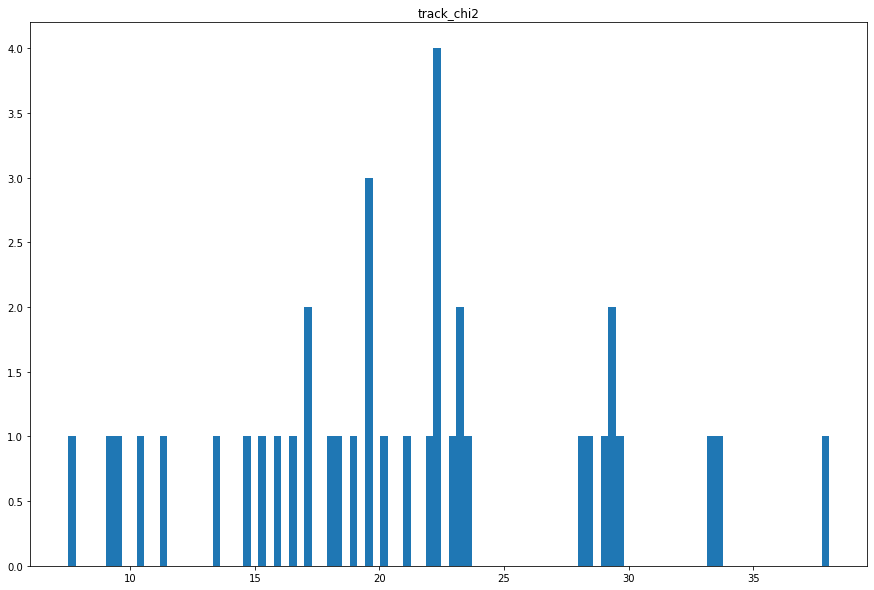

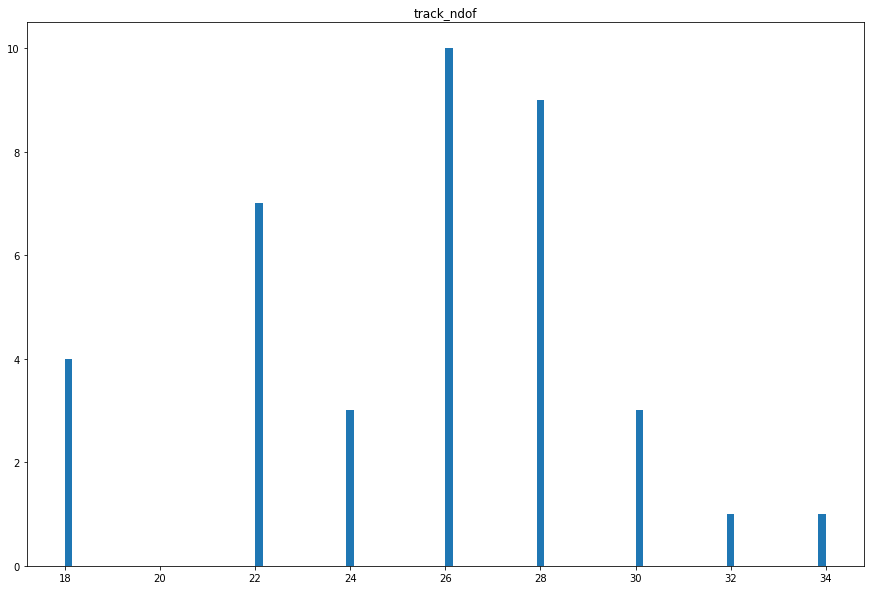

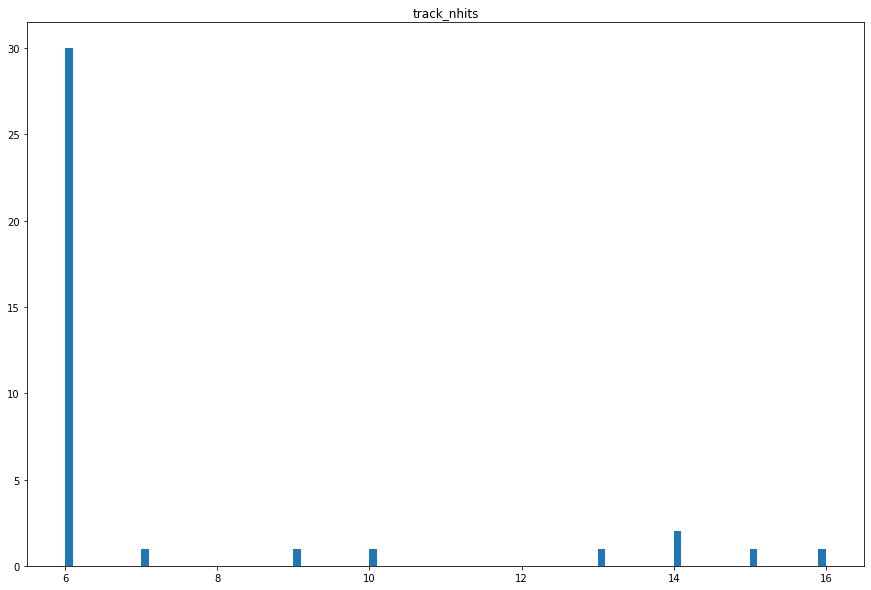

ValueError: cannot convert to RegularArray because subarray lengths are not regular (in compiled code: https://github.com/scikit-hep/awkward/blob/awkward-cpp-17/awkward-cpp/src/cpu-kernels/awkward_ListOffsetArray_toRegularArray.cpp#L22)

This error occurred while calling

    ak.to_numpy(
        <Array [[-0.0603, -0.0402, ..., 0.0941], ...] type='38 * var * float64'>
        allow_missing = True
    )

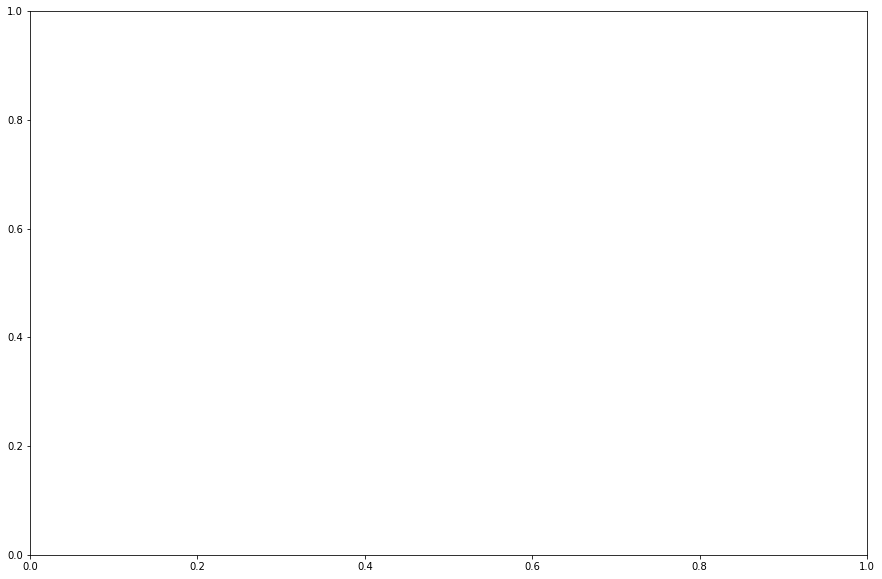

In [69]:
for i in dataBIB.keys():
    plot1DHistogram(dataBIB[i], bins=100, label=str(i))

In [55]:
findLen(dataBIB["track_hit_t"])

10
3
5
7
2
1
5
4
3
1
7


In [66]:
print(len(dataBIB["track_hit_t"][0][0]))

6


In [70]:
dir(dataBIB)

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']